(sec:numpy_3)=
# 어레이 중심 프로그래밍

주어진 어레이를 조작하여 새로운 어레이를 생성하는 함수를 효율적으로 활용하는 것이
**어레이 중심 프로그래밍**<font size='2'>array-oriented programming</font>의 핵심이다.
여기서는 어레이 중심 프로그래밍에 가중 중요한 넘파이 함수와 어레이 메서드를 소개한다.

**주요 내용**

- 유니버설 함수
- 기초 통계 함수
- 부울 어레이 활용
- 어레이 정렬
- 기초 선형대수 함수
- 난수 생성 함수

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [2]:
# 파이플롯
import matplotlib.pyplot as plt

# # 도표 크기 지정
# plt.rc('figure', figsize=(10, 6))

## 유니버설 함수

**유니버설 함수**<font size='2'>universal function</font>는 어레이의 항목 각각에 대해 적용되는 함수이며, **ufunc**로도 불린다.
60개 이상의 유니버설 함수가 존재한다.
보다 자세한 내용은 [유니버설 함수 공식문서](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)에서
확인할 수 있다.

여기서는 예제를 통해 유니버설 함수의 기초 활용법을 살펴본다.
먼저 (2, 5) 모양의 어레이를 하나 생성하자.

In [3]:
arr = np.arange(10).reshape((2,5))
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

**`np.sqrt()` 함수**

주어진 어레이 각 항목의 제곱근으로 이루어진 어레이가 반환된다.

In [4]:
np.sqrt(arr)

array([[0.    , 1.    , 1.4142, 1.7321, 2.    ],
       [2.2361, 2.4495, 2.6458, 2.8284, 3.    ]])

**`np.exp()` 함수**

주어진 어레이 각 항목에 대해 $e^x$ 함수를 적용한다.
$e$는 오일러 상수를 가리키며 2.17128 정도의 무리수다.

In [5]:
np.exp(arr)

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

**`np.maximum()`/`np.minimum()` 함수**

동일한 모양의 두 어레이를 대상으로 항목별 최댓값/최솟값으로 이루어진 어레이를 반환한다.

In [6]:
x = np.random.randn(8).reshape((4, 2))
y = np.random.randn(8).reshape((4, 2))

In [7]:
x

array([[-0.2047,  0.4789],
       [-0.5194, -0.5557],
       [ 1.9658,  1.3934],
       [ 0.0929,  0.2817]])

In [8]:
y

array([[ 0.769 ,  1.2464],
       [ 1.0072, -1.2962],
       [ 0.275 ,  0.2289],
       [ 1.3529,  0.8864]])

In [9]:
np.maximum(x, y)

array([[ 0.769 ,  1.2464],
       [ 1.0072, -0.5557],
       [ 1.9658,  1.3934],
       [ 1.3529,  0.8864]])

In [10]:
np.minimum(x, y)

array([[-0.2047,  0.4789],
       [-0.5194, -1.2962],
       [ 0.275 ,  0.2289],
       [ 0.0929,  0.2817]])

**`np.divmod()` 함수**

여러 개의 어레이를 반환하는 유니버설 함수도 있다.
예를 들어, `divmod()` 함수는 어레이 나눗셈 실행 결과를 항목별 나눗셈의 몫으로 이루어진 어레이와
나머지로 이루어진 어레이의 튜플을 반환한다.

먼저 (2,4) 모양의 어레이를 하나 만들자.

In [11]:
arr = np.arange(10,32, 3).reshape((2,4))
arr

array([[10, 13, 16, 19],
       [22, 25, 28, 31]])

위 어레이를 3으로 나누면 모든 항목 각각에 대한 몫과 나머지를 각각 따로 모아 두 개의 어레이로 이루어진 튜플을 
반환한다.

In [12]:
np.divmod(arr, 3)

(array([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10]]),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1]]))

두 어레이의 나눗셈도 가능하다.

In [13]:
arr2 = np.arange(2, 10).reshape((2,4))
arr2

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [14]:
np.divmod(arr, arr2)

(array([[5, 4, 4, 3],
        [3, 3, 3, 3]]),
 array([[0, 1, 0, 4],
        [4, 4, 4, 4]]))

부동소수점의 나눗셈에 대해서도 몫과 나머지를 구한다.

In [15]:
arr3 = np.arange(10,30, 2.5).reshape((2,4))
arr3

array([[10. , 12.5, 15. , 17.5],
       [20. , 22.5, 25. , 27.5]])

In [16]:
arr4 = np.arange(2, 4.3, 0.3).reshape((2,4))
arr4

array([[2. , 2.3, 2.6, 2.9],
       [3.2, 3.5, 3.8, 4.1]])

In [17]:
np.divmod(arr3, arr4)

(array([[5., 5., 5., 6.],
        [6., 6., 6., 6.]]),
 array([[0. , 1. , 2. , 0.1],
        [0.8, 1.5, 2.2, 2.9]]))

**유니버설 함수 생성: `np.vectorize()`**

`np.vectorize()` 함수를 이용하여 임의의 함수를 유이버설 함수처럼 작동하게 만들 수 있다.
예를 들어 아래 함수는 인자가 0보다 크거나 같으면 0을, 작으면 1을 반환한다.

In [26]:
def pos_neg(x):
    return int(x >= 0)

위 함수를 임의의 어레이에 항목별로 적용하도록 하기 위해서 먼저 유니버설 함수로 변환한다.

In [27]:
pos_neg_ufunc = np.vectorize(pos_neg)

이제 `pos_neg_unfuc()` 함수를 아래 어레이에 적용하면 0과 1로 구성된 어레이가 생성된다.

In [ ]:
np.random.seed(17)

randn_x = np.random.randn(8).reshape((4, 2))  #표준화? 평균0 표준편차 1로 만드는 것
randn_x

array([[ 0.2763, -1.8546],
       [ 0.6239,  1.1453],
       [ 1.0372,  1.8866],
       [-0.1117, -0.3621]])

In [28]:
pos_neg_ufunc(randn_x)

array([[1, 0],
       [1, 1],
       [1, 1],
       [0, 0]])

## 기초 통계 함수

넘파이 어레이에 사용된 항목들의 합(sum), 평균값(mean), 표준편차(std) 등 기본 통계를 계산하는 어레이 메서드가 지원된다.
연습을 위해 먼저 (2, 3) 모양의 어레이를 무작위로 생성한다.

In [11]:
arr = np.arange(1, 7).reshape(2, 3)
arr

array([[1, 2, 3],
       [4, 5, 6]])

**`mean()` 메서드**

어레이에 포함된 모든 값들의 평균값을 계산한다.

In [12]:
arr.mean()

3.5

**`sum()` 메서드**

어레이에 포함된 모든 값들의 합을 계산한다.

In [13]:
arr.sum()

21

**`cumsum()` 메서드**

어레이에 포함된 모든 값들의 누적합을 계산한다.

In [14]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21])

**`cumprod()` 메서드**

어레이에 포함된 모든 값들의 누적곱을 계산한다.

In [15]:
arr.cumprod()

array([  1,   2,   6,  24, 120, 720])

<**축<font size='2'>axis</font> 활용**>

앞서 언급된 모든 함수는 축(axis)을 이용하는 기능도 지원한다.
축 지정은 `axis` 키워드 인자를 사용한다.

* `axis=0`: 행을 기준으로 함수 적용 
* `axis=1`: 열을 기준으로 함수 적용

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-sum.png" style="width:330px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

**평균값**

* 열별 평균값 계산: 행을 따라 평균값을 계산해야 하기에 `axis=0` 지정.

In [23]:
arr.mean(axis=0)

array([2.5, 3.5, 4.5])

* 행별 평균값 계산: 열을 따라 평균값을 계산해야 하기에 `axis=1` 지정.

In [24]:
arr.mean(axis=1)

array([2., 5.])

**합**

* 열별 항목의 합 계산: 행을 따라 항목들의 합을 계산해야 하기에 `axis=0` 지정.

In [25]:
arr.sum(axis=0)

array([5, 7, 9])

* 행별 항목의 합 계산: 열을 따라 항목들의 합을 계산해야 하기에 `axis=1` 지정.

In [26]:
arr.sum(axis=1)

array([ 6, 15])

**누적합**

* 열별 항목의 누적합 계산: 행을 따라 항목들의 누적합을 계산해야 하기에 `axis=0` 지정.

In [27]:
arr.cumsum(axis=0)

array([[1, 2, 3],
       [5, 7, 9]])

* 행별 항목의 누적합 계산: 열을 따라 항목들의 누적합을 계산해야 하기에 `axis=1` 지정.

In [28]:
arr.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

**누적곱**

* 열별 항목의 누적곱 계산: 행을 따라 항목들의 누적곱을 계산해야 하기에 `axis=0` 지정.

In [29]:
arr.cumprod(axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

* 행별 항목의 누적곱 계산: 열을 따라 항목들의 누적곱을 계산해야 하기에 `axis=1` 지정.

In [30]:
arr.cumprod(axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

**`min()/max()` 메서드 vs. `argmin()`/`argmax()` 메서드**

- `min()`/`max()` 메서드: 항목 중에서 최솟값/최댓값 확인. 축 활용 가능.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-min.png" style="width:350px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

- `argmin()`/`argmax()` 메서드: 최소 항목/최대 항목이 위치한 곳의 인덱스 확인. 축 활용 가능.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-argmin.png" style="width:350px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

설명을 위해 아래 어레이를 이용한다.

In [ ]:
#aggregation 집계, index를 리턴
arr= np.array([[4, 8, 5], [9, 3, 1]])
arr

array([[4, 8, 5],
       [9, 3, 1]])

`min()`/`max()` 메서드는
지정된 축을 기준으로 가장 작은 또는 가장 큰 값을 반환한다.
축을 지정하지 않으면 전체 항목을 대상으로 한다.

In [16]:
arr.min()

1

In [17]:
arr.max()

6

축을 지정하면 열별 또는 행별로 최대값/최소값으로 이루어진 어레이를 반환한다.

In [34]:
arr.min(axis=0)

array([4, 3, 1])

In [35]:
arr.max(axis=0)

array([9, 8, 5])

In [36]:
arr.min(axis=1)

array([4, 1])

In [37]:
arr.max(axis=1)

array([8, 9])

`argmin()`/`argmax()` 메서드는
지정된 축을 기준으로 가장 작은 또는 가장 큰 값의 항목이 위치한 인덱스를 반환한다.
축을 지정하지 않으면 전체 항목을 대상으로 하며,
반환된 값은 '어레이를 1차원으로 변환했을 때의 인덱스'를 보여준다.

In [38]:
arr.argmin()

5

In [39]:
arr.argmax()

3

축을 지정하면 축별로 인덱스를 반환한다.

In [40]:
arr.argmin(axis=0)

array([0, 1, 1])

In [41]:
arr.argmax(axis=0)

array([1, 0, 0])

In [42]:
arr.argmin(axis=1)

array([0, 2])

In [43]:
arr.argmax(axis=1)

array([1, 0])

## 부울 어레이 활용

어레이를 이용한 논리식 또한 항목별로 작동하여
부울 어레이가 생성된다.

In [18]:
arr2 = np.arange(1, 7).reshape(2, 3)
arr2

array([[1, 2, 3],
       [4, 5, 6]])

아래 논리식은 각각의 항목에 대해 5보다 큰지 여부를 판단한다.

In [19]:
arr2 > 5

array([[False, False, False],
       [False, False,  True]])

**np.any() 함수**

한 개 이상의 어레이 항목이 참인지 여부를 판단하며, 축을 기준으로 참, 거짓 여부를 판단할 수도 있다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-any.png" style="width:400px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

In [22]:
np.any(arr2 > 5)

True

In [23]:
np.any(arr2 > 5, axis=0)

array([False, False,  True])

In [48]:
np.any(arr2 > 5, axis=1)

array([False,  True])

**np.all() 함수**

어레이의 모든 항목이 참인지 여부를 판단하며, 축을 기준으로 참, 거짓 여부를 판단할 수도 있다.

In [49]:
np.all(arr2 > 5)

False

In [50]:
np.all(arr2 > 5, axis=0)

array([False, False, False])

In [51]:
np.all(arr2 > 5, axis=1)

array([False, False])

**`any()`/`all()` 메서드**

`np.any()`/`np.all()` 함수 대신에 `any()`/`all()` 메서드를 활용할 수도 있다.

아래 코드는 모든 항목이 짝수인지 여부를 판단한다.

In [52]:
(arr2 % 2 == 0).all()

False

짝수가 하나라도 있는지를 알고 싶으면 `any()`를 사용한다.

In [53]:
(arr2 % 2 == 0).any()

True

축 별로 확인할 수도 있다.

In [54]:
(arr2 % 2 == 0).all(axis=0)

array([False, False, False])

In [55]:
(arr2 % 2 == 0).all(axis=1)

array([False, False])

In [56]:
(arr2 % 2 == 0).any(axis=0)

array([ True,  True,  True])

In [57]:
(arr2 % 2 == 0).any(axis=1)

array([ True,  True])

<<**참인 항목의 개수: `sum()` 메서드 활용**>>

`sum()` 메서드를 이용하여 특정 조건을 만족하는 항목들의 개수를 확인할 수 있다.
이유는 `True`는 1, `False`는 0으로 간주되기 때문이다.
아래 코드는 1부터 6까지의 정수 중에서 짝수가 3개임을 확인해준다.

In [58]:
(arr2 % 2 == 0).sum()

3

## 어레이 정렬

**`sort()` 메서드**

정해진 축을 기준으로 오름차순으로 정열할 때 사용한다. 
1차원 어레이는 축을 지정할 필요가 없다.

In [27]:
arr = np.random.randn(6)
arr

array([ 3.2489, -1.0212, -0.5771,  0.1241,  0.3026,  0.5238])

In [28]:
arr.sort()
arr

array([-1.0212, -0.5771,  0.1241,  0.3026,  0.5238,  3.2489])

다차원 어레이는 축을 이용하여 행 또는 열 기준으로 정렬할 수 있다.

In [37]:
arr = np.random.randn(5, 3)
arr

array([[ 0.69  ,  1.0015, -0.5031],
       [-0.6223, -0.9212, -0.7262],
       [ 0.2229,  0.0513, -1.1577],
       [ 0.8167,  0.4336,  1.0107],
       [ 1.8249, -0.9975,  0.8506]])

행을 따라 정렬하려면 인자 0을 사용한다.

In [39]:
arr.sort(0)
arr

array([[-1.1577, -0.7262, -0.6223],
       [-0.9975,  0.0513,  0.2229],
       [-0.9212,  0.69  ,  1.0015],
       [-0.5031,  0.8167,  1.0107],
       [ 0.4336,  0.8506,  1.8249]])

**주의사항:** `sort()` 메서드는 기존의 어레이를 직접 변환한다. 
즉, `arr`이 직접 변경된다. 

In [44]:
arr

array([[-1.1577, -0.7262, -0.6223],
       [-0.9975,  0.0513,  0.2229],
       [-0.9212,  0.69  ,  1.0015],
       [-0.5031,  0.8167,  1.0107],
       [ 0.4336,  0.8506,  1.8249]])

열을 따라 정렬하려면 인자 1을 사용한다.

In [45]:
arr.sort(1)
arr

array([[-1.1577, -0.7262, -0.6223],
       [-0.9975,  0.0513,  0.2229],
       [-0.9212,  0.69  ,  1.0015],
       [-0.5031,  0.8167,  1.0107],
       [ 0.4336,  0.8506,  1.8249]])

**예제**

어레이에 사용된 값들의 백분위수를 정렬을 이용하여 쉽게 구할 수 있다.
예를 들어, 임의로 생성된 1,000개의 부동 소수점들 중에서 하위 5%에 해당하는 수를 구해보자.

In [46]:
large_arr = np.random.randn(1000)

먼저 정렬 한 다음에 하위 5%에 해당하는 위치를 구하여 인덱싱하면 바로 답이 나온다.

In [47]:
large_arr.sort()

하위 5%의 위치는 어레이의 길이에 0.05를 곱해준 값에 해당한다.
인덱스로 사용해야 하기에 정수로 형변환해주면 되며,
예상한 대로 50번 인덱스의 값을 가리킨다.

In [48]:
five_from_bottom = int(0.05 * len(large_arr))
five_from_bottom

50

따라서 하위 5%에 해당하는 값은 아래와 같다.

In [49]:
large_arr[five_from_bottom]

-1.551714991950571

**`argsort()` 메서드**

`argsort()` 메서드는 지정된 축에 따라 정렬했을 때의 각 항목이 자리잡는 위치의 인덱스로 
구성된 어레이를 생성한다.

In [51]:
np.random.seed(1235)

arr = np.random.randint(0,50,(4, 3))
arr

array([[11, 34,  2],
       [47,  3,  7],
       [35, 40, 16],
       [16,  2, 15]])

- 열 별로 작은 값에서부터 큰 값이 자리한 위치의 인덱스 확인

In [52]:
arr.argsort(axis=0)

array([[0, 3, 0],
       [3, 1, 1],
       [2, 0, 3],
       [1, 2, 2]], dtype=int64)

- 행 별로 작은 값에서부터 큰 값이 자리한 위치의 인덱스 확인

In [71]:
arr.argsort(axis=1)

array([[2, 0, 1],
       [1, 2, 0],
       [2, 0, 1],
       [1, 2, 0]])

축을 지정하지 않으면 `axis=-1`, 즉 마지막 축을 기본값으로 이용한다.

In [72]:
arr.argsort() # arr.argsort(axis=-1)

array([[2, 0, 1],
       [1, 2, 0],
       [2, 0, 1],
       [1, 2, 0]])

`axis=None`을 사용하면 모든 항목을 1차원 어레이로 만든 다음에 적용한다.

In [53]:
arr.argsort(axis=None)

array([ 2, 10,  4,  5,  0, 11,  8,  9,  1,  6,  7,  3], dtype=int64)

**예제**

0번 열에 위치한 값들의 순서대로 행을 재배치하려면 다음과 같이 먼저
`argsort()` 메서드를 0번 열에 대해 적용한다.

In [57]:
X = arr[:, 0].argsort()
X

array([0, 3, 2, 1], dtype=int64)

이제 0번열을 기준으로 정렬하려면 `X`를 팬시 인덱싱에 활용한다. 

In [ ]:
arr[X]
#0번 열의 크기순으로 정렬됨

array([[11, 34,  2],
       [16,  2, 15],
       [35, 40, 16],
       [47,  3,  7]])

## 기초 선형 대수 함수

행렬 곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 
간단한 예제를 이용하여 소개한다.

**행렬곱**

먼저 두 개의 행렬을 2차원 어레이로 구현하자.
행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

$$
\text{x} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

In [60]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

$$
\text{y} = 
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
$$

In [61]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

두 행렬의 곱 `x y`는 `dot()` 메서드를 이용하여 구한다.
결과는 (2, 2) 모양의 어레이다.

$$
\text{x y} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
=
\begin{bmatrix}
28 & 64\\
67 & 181
\end{bmatrix}
$$

In [62]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [79]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

**`@` 연산자**

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [80]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

**전치 어레이와 전치 행렬**

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

In [63]:
x = np.arange(1, 7).reshape((3, 2))
x

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 행렬은 전치 어레이로 구현된다.
전치 어레이는 기존 어레이의 축을 교환하며, 뷰<font size='2'>view</font>를 이용한다.
즉, 새로운 어레이를 생성하지 않고 기존 어레이의 정보를 활용한다.

In [64]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

In [65]:
y = np.arange(-6, 0).reshape((2, 3))
y

array([[-6, -5, -4],
       [-3, -2, -1]])

In [66]:
y.T

array([[-6, -3],
       [-5, -2],
       [-4, -1]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [85]:
((x @ y).T == y.T @ x.T).all()

True

**역행렬**

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [68]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-1.4144, -0.7389, -1.5785,  0.6512,  0.4375],
       [-0.0493, -0.0729, -0.4986, -0.4051,  1.2765],
       [ 0.1867, -0.9833, -0.5945,  1.4169, -0.0814],
       [-0.4188,  0.4416,  0.0155,  0.1665, -0.1761],
       [-0.7564,  0.7185,  1.1459, -1.6147,  0.635 ]])

In [69]:
inv(X)

array([[-0.3714,  0.3162, -0.2857, -0.3637, -0.5173],
       [-0.323 ,  0.5322, -0.3958,  1.6483, -0.441 ],
       [-0.3735, -0.1685,  1.0053,  0.2798,  0.8026],
       [-0.3486,  0.3063,  0.9281,  1.3446,  0.1164],
       [-0.2893,  0.8574,  0.6535,  0.6161,  0.3052]])

`X @ (inv(X))` 거의 항등 함수로 계산된다.

__참고:__ 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다.

In [70]:
X @ (inv(X))

array([[ 1., -0.,  0.,  0., -0.],
       [-0.,  1., -0., -0.,  0.],
       [ 0., -0.,  1., -0.,  0.],
       [-0.,  0.,  0.,  1., -0.],
       [-0., -0.,  0., -0.,  1.]])

`numpy.linalg` 모듈에서 제공하는 선형대수 관련 함수들은 [NumPy: 선형 대수](https://numpy.org/doc/stable/reference/routines.linalg.html)에서 
찾아볼 수 있다.

## 난수 생성 함수

가장 많이 사용된 무작위 수 생성함수 3개와 시드(seed)의 역할을 살펴본다.

**`np.random.randn()`/`np.random.normal()` 함수**

임의의 부동소수점을 표준 정규 분포를 따르면서 지정된 수만큼 생성한다.
예를 들어, 아래 코드는 표준 정규 본포를 따르는 5개의 부동소수점으로 구성된 어레이를 생성한다.

In [71]:
np.random.randn(5)

array([-0.8193, -1.9797,  0.4341, -0.7325, -0.5357])

1천개의 부동소수점을 표준 정규 분포를 따르도록 무작위로 생성한 다음 히스토그램을 그리면 
무작위로 선택된 값들이 표준 정규 분포를 따른다는 것을 확인할 수 있다.

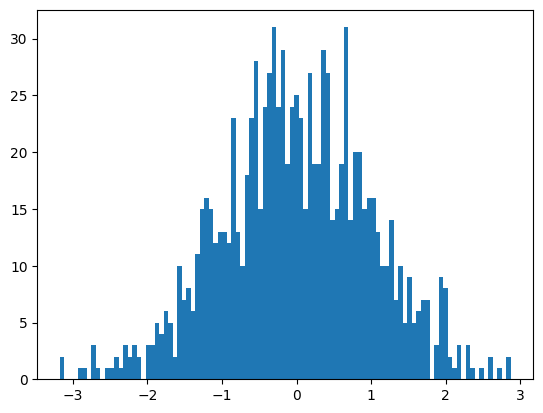

In [72]:
np.random.seed(1000)

samples = np.random.randn(1000)
plt.hist(samples, bins=100)
plt.show()

`np.random.randn(n)`은 `np.random.normal(size=n)`과 동일하게 작동한다.

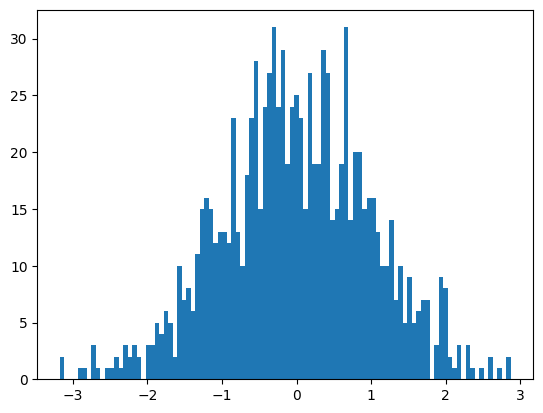

In [73]:
np.random.seed(1000)

samples = np.random.normal(size=1000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.rand()`/`np.random.uniform()` 함수**

0과 1사의 임의의 부동소수점을 균등 분포를 따르면서 지정된 수만큼 생성한다.
예를 들어, 아래 코드는 균등 본포를 따르는 5개의 부동소수점으로 구성된 어레이를 생성한다.

In [92]:
np.random.rand(5)

array([0.8388, 0.9598, 0.1309, 0.4877, 0.1036])

1천개의 부동소수점을 균등 분포를 따르도록 무작위로 생성한 다음 히스토그램을 그리면 
무작위로 선택된 값들이 0부터 1 사이에서 균등하게 선택되었다는 것을 확인할 수 있다.

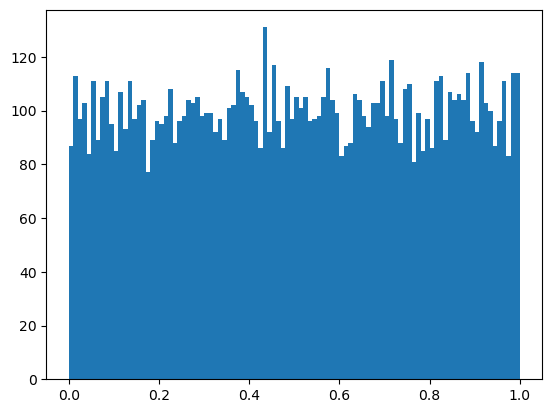

In [93]:
np.random.seed(1000)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

`np.random.rand(n)`은 `np.random.uniform(0, 1, n)`과 동일하게 작동한다.

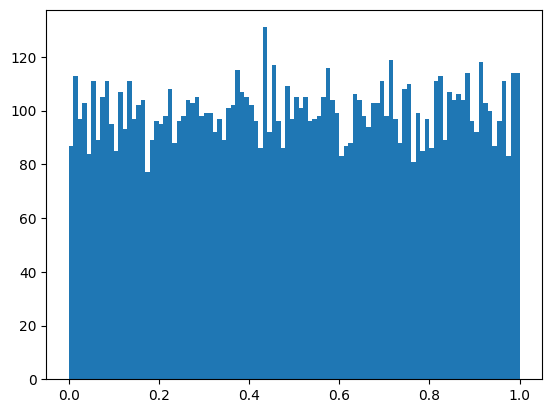

In [74]:
np.random.seed(1000)
samples = np.random.uniform(0, 1, 10000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.randint()` 함수**

지정된 구간 사이에서 임의의 정수를 균등 분포를 따르면서 지정된 수만큼 생성한다.

아래 코드는 0부터 100까지의 정수 중에서 1천 개의 정수를 균등 분포를 따르도록 무작위로 생성한 다음 히스토그램을 그린다.
무작위로 선택된 값들이 0부터 100사이에 균등하게 분포되어 있다는 것을 확인할 수 있다.

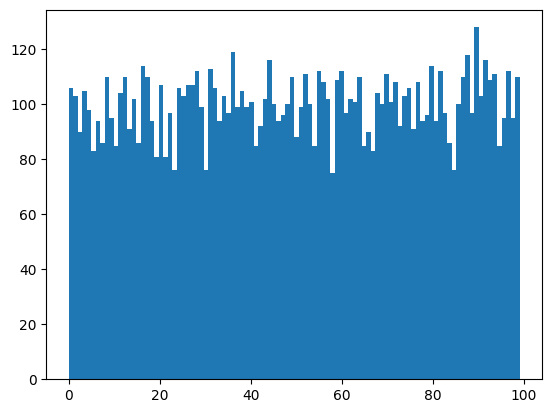

In [75]:
np.random.seed(1000)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

**시드(seed)**

위에서 살펴본 무작위 함수들은 원래 실행할 때마다 조금씩 다른 무작위수를 생성한다.
하지만 시드를 지정하면 무작위 수도 동일하게 결정된다.
시드는 컴퓨터가 사용하는 난수표(random number table)의 특정 지점을 지정한다.
무작위 함수를 실행할 때마다 시드가 1씩 커진다.
따라서 시드를 지정하면 동일한 시드가 설정되어 난수표에서 항상 동일한 값을 선택하게 된다.

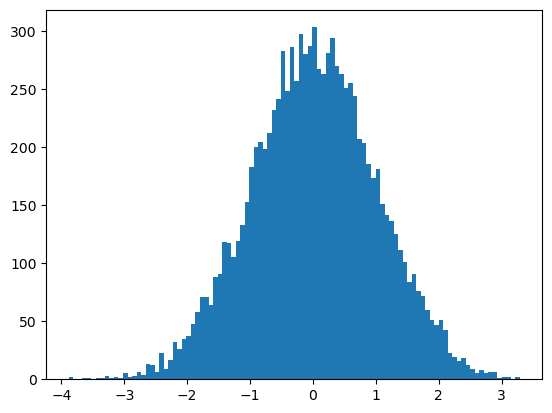

In [96]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

시드를 달리하면 다른 결과가 나온다.

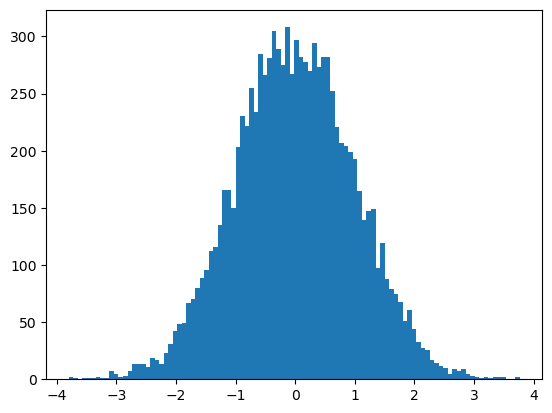

In [97]:
np.random.seed(17)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

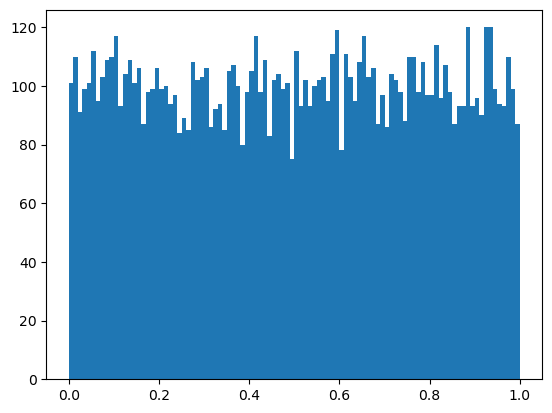

In [98]:
np.random.seed(1234)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

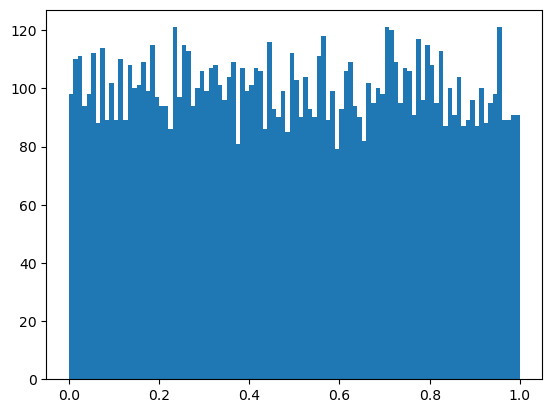

In [99]:
np.random.seed(17)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

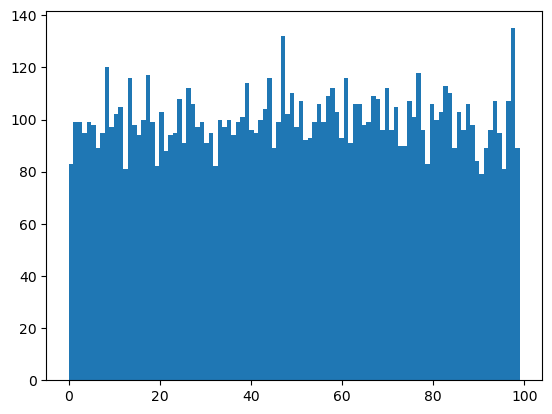

In [100]:
np.random.seed(1234)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

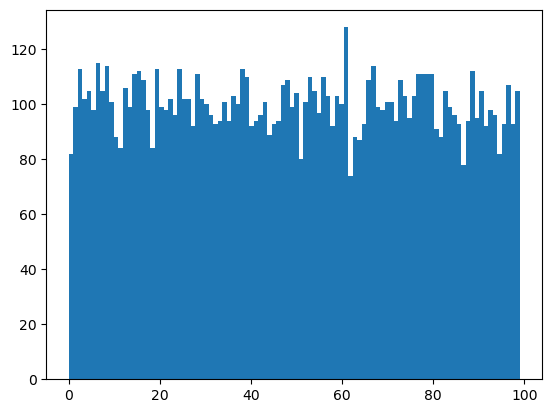

In [101]:
np.random.seed(17)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

## 연습문제

참고: [(실습) 어레이 중심 프로그래밍](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-numpy_3.ipynb)